*Author: leo.lopes*

# Additional EDA

This notebook aims to perform some EDA, in addition to the given ones in EDA.ipynb

## Load every important files

*Applying `eval` to each entry in the corresponding column, converting string representations of Python literals into their actual Python objects.*

In [ ]:
from load_clean import load_data

big_matrix, small_matrix, social_network, item_categories, user_features, item_daily_features = load_data()

Loading big and small matrices...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.


## Visualize the raw data

In [25]:
small_matrix
# social_network
# item_categories
# user_features
# item_daily_features

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


## Advanced Data Visualisation

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from matplotlib.font_manager import FontProperties
from scipy.stats import norm, skew
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.8, edgecolor='darkcyan', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

## Some stats...

In this section, we explore key aspects of the dataset through visualizations.

### Number of friends

We start by examining the *social network* data, focusing on the number of friends each user has. The distribution reveals that the vast majority of users have only **one** friend. With a *mean* of approximately 1.41 and a *maximum* of 5, it’s evident that most users maintain a small circle of connections. This suggests that users may primarily connect with close acquaintances or loved ones, potentially indicating **shared interests or preferences**.

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


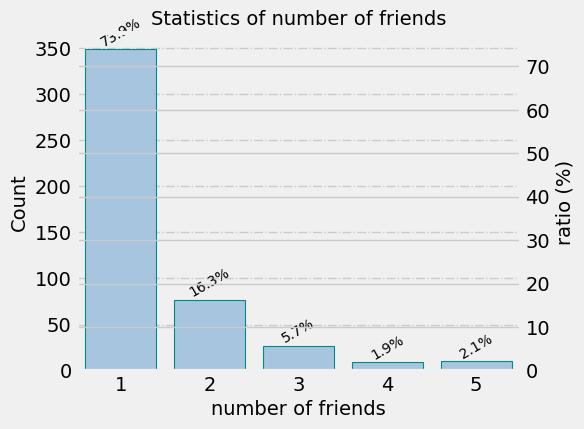

In [7]:
print(social_network.friend_list.map(len).describe())
visual_statistics_discrete(social_network.friend_list.map(len), "number of friends")

### Number of tags

Next, we examine the distribution of **item categories (tags)** assigned to videos. As with the social network data, we observe a **sparse pattern**: most videos have **only one tag**, with a **maximum of `4` tags** and a **mean of around `1.18`**. Each video has at least one tag, which is a good news.

This narrow tagging suggests that videos are typically associated with **focused and specific topics**, rather than being broadly categorized. From a modeling perspective, this can be advantageous:

- **Content-based models** can leverage this structure to build **cleaner item profiles**, reducing noise.
- **Embedding techniques** might perform better with fewer, more distinct category associations.
- The limited overlap in tags may help improve **category-aware recommendation strategies** by maintaining higher tag-specific relevance.

count    10728.000000
mean         1.183166
std          0.436205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


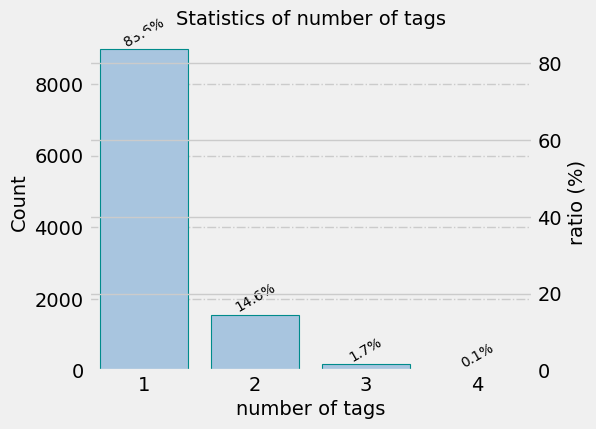

In [8]:
num_feat = item_categories.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

### Distribution of tags

Now let's see how these tags are distributed !

The chart shows the distribution of **video tags (categories)**, revealing a **strong imbalance**. Tags like **11** and **28** are the most common, each representing over **10%** of the dataset, while many tags appear only a handful of times.

This suggests a **long-tail distribution**, where a few tags dominate and most are rarely used. Such imbalance is typical in user-generated content platforms.

Possible impacts on recommendation models:

- Popular tags may **bias recommendations**, reducing diversity.
- Rare tags may lead to **cold-start issues** in collaborative filtering.
- Potential solutions include **tag reweighting**, **oversampling rare categories**, or using **embedding-based generalization** to better capture relationships between tags.


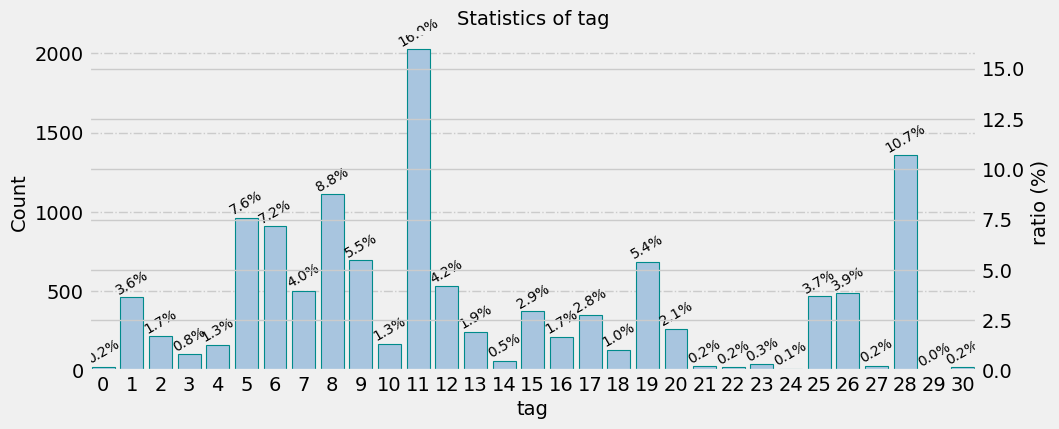

In [9]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

### Distribution of watch ratio

count    1.241552e+07
mean     8.510664e-01
std      7.185296e-01
min      0.000000e+00
25%      3.111008e-01
50%      7.161066e-01
75%      1.161843e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


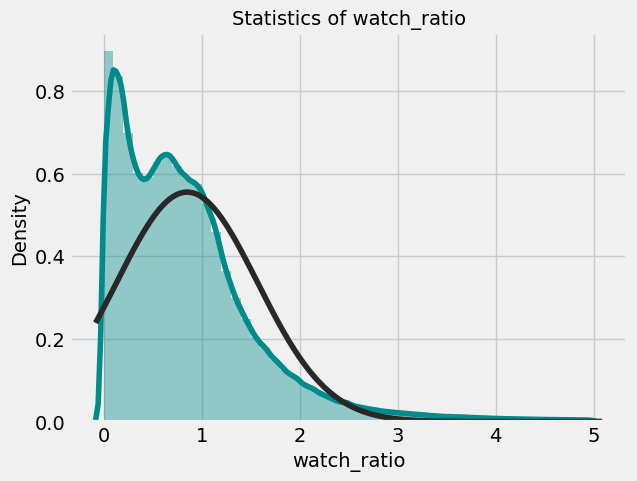

In [15]:
# watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 5]
watch_ratio = big_matrix.watch_ratio[big_matrix.watch_ratio <= 5]

print(watch_ratio.describe())
visual_continue(watch_ratio)

### Distribution of video duration

count    4.676570e+06
mean     1.448645e+04
std      2.046711e+04
min      3.067000e+03
25%      7.523000e+03
50%      9.600000e+03
75%      1.193400e+04
max      3.150720e+05
Name: video_duration, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


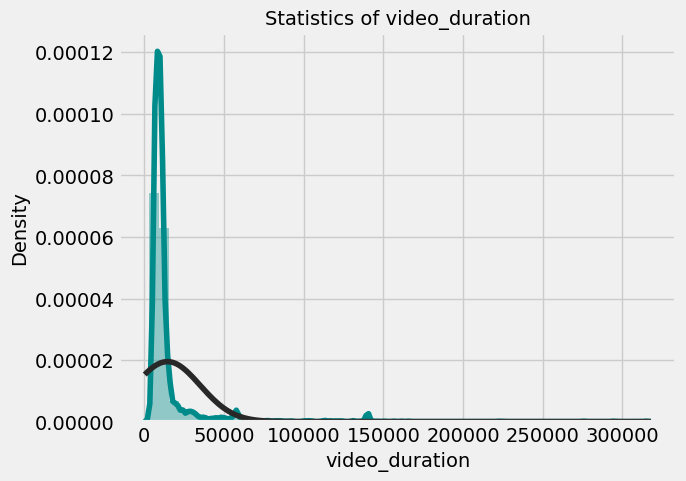

/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


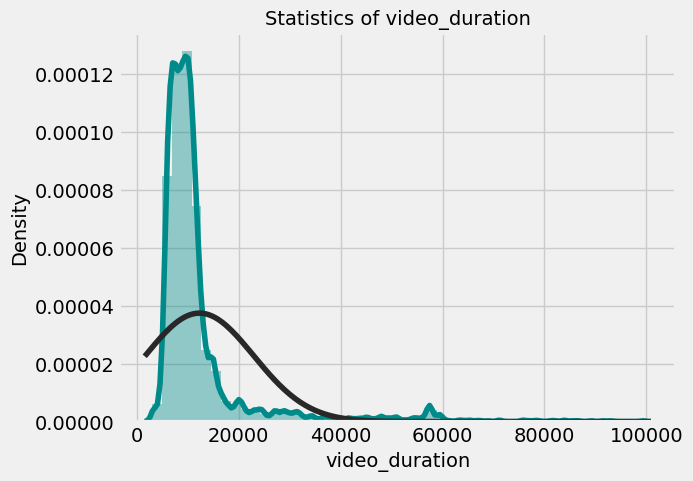

In [16]:
# video_duration = big_matrix.video_duration
video_duration = small_matrix.video_duration

print(video_duration.describe())
visual_continue(video_duration)
visual_continue(video_duration[video_duration < 100000])

### Distribution of each user's total play times

              date
count  1411.000000
mean   3314.365698
std       6.984852
min    3295.000000
25%    3309.000000
50%    3315.000000
75%    3320.000000
max    3327.000000


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


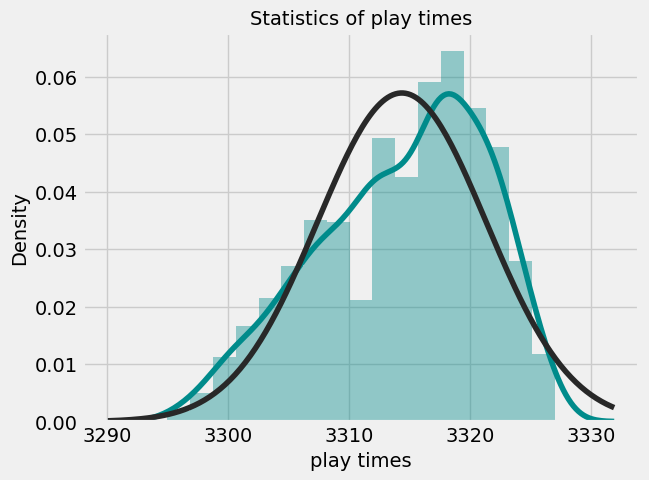

In [17]:
# play_time = big_matrix.groupby('user_id').agg({"date":len})
play_time = small_matrix.groupby('user_id').agg({"date":len})

play_time.name = "play times"
print(play_time.describe())
visual_continue(play_time)

### Distribution of each user's daily play times

count    86671.000000
mean        51.857922
std         32.608372
min          1.000000
25%         28.000000
50%         47.000000
75%         70.000000
max        402.000000
Name: play times, dtype: float64


/var/folders/0j/8skb_l2j2ms5bcd5v4zdm3fw0000gn/T/ipykernel_69047/2416216360.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df, color='darkcyan', kde=True, fit=norm)


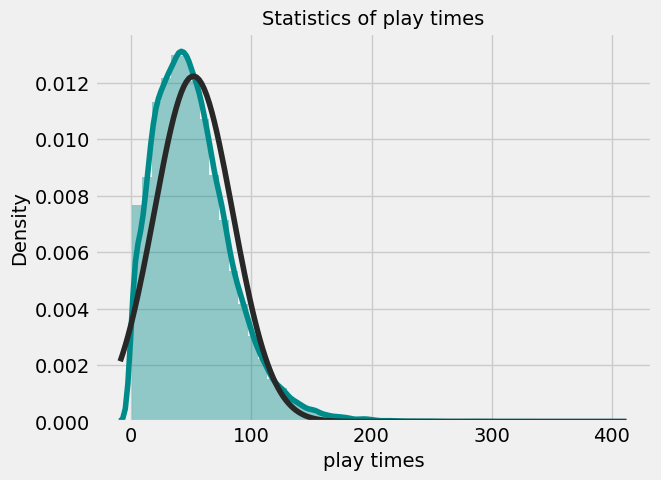

In [18]:
#daily_play_time = big_matrix.groupby(['user_id', 'date']).size()
daily_play_time = small_matrix.groupby(['user_id', 'date']).size()


daily_play_time.name = "play times"
print(daily_play_time.describe())
visual_continue(daily_play_time)